### Gradient Descent
Hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [3]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


In [4]:
# y = 4 + 3x
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

Solution found by formula: w =  [[4.0071715  2.98225924]]


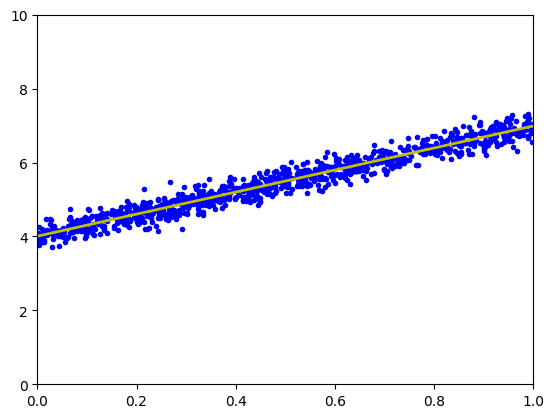

In [5]:
# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [6]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2

In [7]:
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [8]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.


Tôi xin nhắc lại rằng nghiệm cuối cùng của Gradient Descent phụ thuộc rất nhiều vào điểm khởi tạo và learning rate.

### 1. Các thuật toán tối ưu Gradient Descent

#### 1.1 Momentum

In [25]:
# check convergence
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new)/len(theta_new)) < 1e-3

def GD_momentum(theta_init, grad, eta, gamma):
    # Suppose we want to store history of theta or return theta[-1]
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break 
        theta.append(theta_new)
        v_old = v_new
    return theta 

# ----------------------------------------------------------------------------------------------------

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.mlab as mlab
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)


def cost(w):
	return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
	return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


def numerical_grad(w, cost):
	eps = 1e-4
	g = np.zeros_like(w)
	for i in range(len(w)):
		w_p = w.copy()
		w_n = w.copy()
		w_p[i] += eps 
		w_n[i] -= eps
		g[i] = (cost(w_p) - cost(w_n))/(2*eps)
	return g 

def check_grad(w, cost, grad):
	w = np.random.rand(w.shape[0], w.shape[1])
	grad1 = grad(w)
	grad2 = numerical_grad(w, cost)
	return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 


print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))
    

Checking gradient... True


#### 1.2. Nesterov accelerated gradient (NAG)

In [26]:
w_exact = np.dot(np.linalg.pinv(A), b)

def GD_NAG(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1] - gamma*v[-1])
        w_new = w[-1] - v_new
#         print(np.linalg.norm(grad(w_new))/len(w_new))
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_mm, it_mm) = GD_NAG(w_init, grad, .5, 0.9)
# print(it_mm, w_mm)

In [27]:
import matplotlib

N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N 
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 +b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
/var/folders/_r/8_j_gs155rq_341pr8_2q4mc0000gn/T/ipykernel_5491/3427170218.py:23: SyntaxWarning: invalid escape sequence '\e'
  xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
MovieWriter imagemagick unavailable; using Pillow instead.


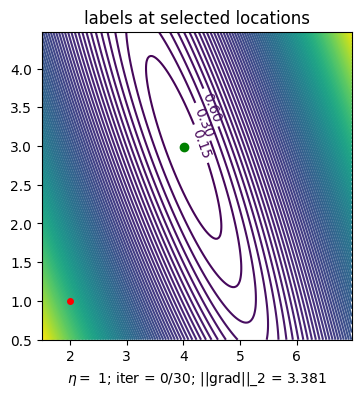

In [33]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def save_gif2(eta, gamma):
    (w, it) = GD_NAG(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
#     x0 = np.linspace(0, 1, 2, endpoint=True)
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            animlist = plt.title('labels at selected locations')
            
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
#     fn = 'img2_' + str(eta) + '.gif'
    fn = 'LR_NAG_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')

eta = 1 
gamma = .9
save_gif2(eta, gamma)
# save_gif2(.1)
# save_gif2(2)

### 2. Biến thể của Gradient Descent

#### 2.1. Batch Gradient Descent

#### 2.2. Stochastic Gradient Descent

In [14]:
# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data
        rd_id = np.random.permutation(N)
        for i in range(10):
            count += 1
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:                                    
                    return w
                w_last_check = w_this_check
    return w

#### 2.3. Mini-batch Gradient Descent

#### 3. Stopping Criteria (điều kiện dừng)

Trong thực nghiệm, có một vài phương pháp như dưới đây:

1. Giới hạn số vòng lặp: đây là phương pháp phổ biến nhất và cũng để đảm bảo rằng chương trình chạy không quá lâu. Tuy nhiên, một nhược điểm của cách làm này là có thể thuật toán dừng lại trước khi đủ gần với nghiệm.

2. So sánh gradient của nghiệm tại hai lần cập nhật liên 
tiếp, khi nào giá trị này đủ nhỏ thì dừng lại. Phương pháp này cũng có một nhược điểm lớn là việc tính đạo hàm đôi khi trở nên quá phức tạp (ví dụ như khi có quá nhiều dữ liệu), nếu áp dụng phương pháp này thì coi như ta không được lợi khi sử dụng SGD và mini-batch GD.

3. So sánh giá trị của hàm mất mát của nghiệm tại hai lần cập nhật liên tiếp, khi nào giá trị này đủ nhỏ thì dừng lại. Nhược điểm của phương pháp này là nếu tại một thời điểm, đồ thị hàm số có dạng bẳng phẳng tại một khu vực nhưng khu vực đó không chứa điểm local minimum (khu vực này thường được gọi là saddle points), thuật toán cũng dừng lại trước khi đạt giá trị mong muốn.

4. Trong SGD và mini-batch GD, cách thường dùng là so sánh nghiệm sau một vài lần cập nhật. Trong đoạn code Python phía trên về SGD, tôi áp dụng việc so sánh này mỗi khi nghiệm được cập nhật 10 lần. Việc làm này cũng tỏ ra khá hiệu quả.


#### 4. Một phương pháp tối ưu đơn giản khác: Newton’s method